In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.float_format = '{:.2f}'.format

# TASK 1: DATA LOADING AND UNDERSTANDING 
## 1.1 : LOAD EACH DATASET AND DISPLAY ITS STRUCTURE

In [2]:
State_Txn_Users = pd.read_excel(r"C:\Users\Harshit\Downloads/phonepe-pulse_raw-data.xlsx", sheet_name = "State_Txn and Users")
State_Txn_Split = pd.read_excel(r"C:\Users\Harshit\Downloads/phonepe-pulse_raw-data.xlsx", sheet_name = "State_TxnSplit")
State_Device_Data = pd.read_excel(r"C:\Users\Harshit\Downloads/phonepe-pulse_raw-data.xlsx", sheet_name = "State_DeviceData")
District_Txn_Users = pd.read_excel(r"C:\Users\Harshit\Downloads/phonepe-pulse_raw-data.xlsx", sheet_name = "District_Txn and Users")
District_Demo = pd.read_excel(r"C:\Users\Harshit\Downloads/phonepe-pulse_raw-data.xlsx", sheet_name = "District Demographics")

In [134]:
# Display top 5 rows to have basic column understanding.
State_Txn_Users.head()
State_Txn_Split.head()
State_Device_Data.head()
District_Txn_Users.head()
District_Demo.head()

,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,14631761,2198,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,28338536,2499,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,55557471,3416,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,90548336,3811,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,102299741,3356,18596,0


,State,Year,Quarter,Transaction Type,Transactions,Amount (INR),ATV (INR)
0,Andaman & Nicobar Islands,2018,1,Recharge & bill payments,4200,1845307,439
1,Andaman & Nicobar Islands,2018,1,Peer-to-peer payments,1871,12138655,6488
2,Andaman & Nicobar Islands,2018,1,Merchant payments,298,452507,1518
3,Andaman & Nicobar Islands,2018,1,Financial Services,33,10601,321
4,Andaman & Nicobar Islands,2018,1,Others,256,184690,721


,State,Year,Quarter,Brand,Registered Users,Percentage
0,Andaman & Nicobar Islands,2018,1,Xiaomi,1665,0
1,Andaman & Nicobar Islands,2018,1,Samsung,1445,0
2,Andaman & Nicobar Islands,2018,1,Vivo,982,0
3,Andaman & Nicobar Islands,2018,1,Oppo,501,0
4,Andaman & Nicobar Islands,2018,1,OnePlus,332,0


,State,Year,Quarter,District,Code,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,Nicobars,AN01,528,1139849,2159,262,0
1,Andaman & Nicobar Islands,2018,1,North And Middle Andaman,AN02,442,931663,2108,632,0
2,Andaman & Nicobar Islands,2018,1,South Andaman,AN03,5688,12560249,2208,5846,0
3,Andaman & Nicobar Islands,2018,2,Nicobars,AN01,1120,3072437,2743,351,0
4,Andaman & Nicobar Islands,2018,2,North And Middle Andaman,AN02,825,1317863,1597,911,0


,State,District,Headquarters,Population,Area (sq km),Density,Code,Alternate Name
0,Andhra Pradesh,Anantapur,Anantapur,4083315,19130,213,AP01,Anantapur
1,Andhra Pradesh,Chittoor,Chittoor,4170468,15152,275,AP02,Chittoor
2,Andhra Pradesh,East Godavari,Kakinada,5151549,10807,477,AP03,East Godavari
3,Andhra Pradesh,Guntur,Guntur,4889230,11391,429,AP04,Guntur
4,Andhra Pradesh,YSR,Kadapa,2884524,15359,188,AP13,YSR


## 1.2 : DISPLAY BASIC STATISTICS AND DATA TYPES OF EACH DATATYPE

In [10]:
# 1. Get summary statistics for numerical columns
print("Summary statistics for State_Txn_Users dataset:")
State_Txn_Users.describe()
print("\nSummary statistics for State_Txn_Split dataset:")
State_Txn_Split.describe()
print("\nSummary statistics for State_Device_Data dataset:")
State_Device_Data.describe()
print("\nSummary statistics for District_Txn_Users dataset:")
District_Txn_Users.describe() 
print("\nSummary statistics for District_Demo dataset:")
District_Demo.describe()

Summary statistics for State_Txn_Users dataset:


,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
count,504,504,504,503,504,504,504
mean,2019,2,40740001,70833320602,1993,4777501,97744705
std,1,1,82287143,144090233156,607,6644496,204237580
min,2018,1,778,1928611,0,501,0
25%,2018,1,592558,1167157029,1599,157420,0
50%,2019,2,6217487,10516054014,1861,1747914,2930574
75%,2020,3,43636746,69470450912,2259,7320945,86150218
max,2021,4,573616486,1027958332798,3939,39664697,1208083592



Summary statistics for State_Txn_Split dataset:


,Year,Quarter,Transactions,Amount (INR),ATV (INR)
count,2514,2514,2514,2514,2514
mean,2019,2,8167446,14439779210,1350
std,1,1,24236454,59950544781,1535
min,2018,1,2,34,17
25%,2018,1,27881,17624122,386
50%,2019,2,268798,190118949,721
75%,2020,3,3683230,2661247757,1353
max,2021,4,279599017,872151973638,7768



Summary statistics for State_Device_Data dataset:


,Year,Quarter,Registered Users,Percentage
count,5544,5544,5544,5544
mean,2019,2,434318,0
std,1,1,905607,0
min,2018,1,10,0
25%,2018,1,8056,0
50%,2019,2,74422,0
75%,2020,3,397888,0
max,2021,4,9764252,0



Summary statistics for District_Txn_Users dataset:


,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
count,10248,10248,10248,10248,10244,10248,10248
mean,2019,2,2003607,3542311176,1910,234959,4807117
std,1,1,9613466,14731537480,601,460598,15625415
min,2018,1,0,0,85,22,0
25%,2018,1,103142,175666806,1555,36196,0
50%,2019,2,376306,678456240,1863,106764,640302
75%,2020,3,1272815,2377255937,2203,257316,4346320
max,2021,4,348712787,444422398358,11210,10604609,554419656



Summary statistics for District_Demo dataset:


,Population,Area (sq km),Density
count,742,742,742
mean,1668555,4395,839
std,1458849,4255,2754
min,0,0,0
25%,653082,2040,198
50%,1322359,3402,353
75%,2297440,5433,686
max,10082852,45652,36155


In [12]:
# 2. Get data types of each dataset
print("Data types of columns in State_Txn_Users dataset:")
print(State_Txn_Users.dtypes)  
print("\nData types of columns in State_Txn_Split dataset:")
print(State_Txn_Split.dtypes)  
print("\nData types of columns in State_Device_Data dataset:")
print(State_Device_Data.dtypes)  
print("\nData types of columns in District_Txn_Users dataset:")
print(District_Txn_Users.dtypes)  
print("\nData types of columns in District_Demo dataset:")
print(District_Demo.dtypes)  

Data types of columns in State_Txn_Users dataset:
State                object
Year                  int64
Quarter               int64
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
Registered Users      int64
App Opens             int64
dtype: object

Data types of columns in State_Txn_Split dataset:
State                object
Year                  int64
Quarter               int64
Transaction Type     object
Transactions          int64
Amount (INR)        float64
ATV (INR)           float64
dtype: object

Data types of columns in State_Device_Data dataset:
State                object
Year                  int64
Quarter               int64
Brand                object
Registered Users      int64
Percentage          float64
dtype: object

Data types of columns in District_Txn_Users dataset:
State                object
Year                  int64
Quarter               int64
District             object
Code                 object
Transactions          

## 1.3 CHECK FOR MISSING VALUES

In [7]:
# Function to identify missing values in a dataset
def identify_missing_values(df, dataset_name):
    missing_counts = df.isnull().sum()  # Count missing values per column
    total_missing = missing_counts.sum()  # Total missing values in dataset
    
    if total_missing > 0:
        print(f"\nDataset: {dataset_name} => Total Missing Values: {total_missing}")
        print("Columns with missing values:")
        print(missing_counts[missing_counts > 0])  # Display only columns with missing values
    else:
        print(f"\nDataset: {dataset_name} => No missing values found.")

# Check for missing values in each dataset
identify_missing_values(State_Txn_Users, "State_Txn_Users")
identify_missing_values(State_Txn_Split, "State_Txn_Split")
identify_missing_values(State_Device_Data, "State_Device_Data")
identify_missing_values(District_Txn_Users, "District_Txn_Users")
identify_missing_values(District_Demo, "District_Demo")



Dataset: State_Txn_Users => Total Missing Values: 1
Columns with missing values:
Amount (INR)    1
dtype: int64

Dataset: State_Txn_Split => No missing values found.

Dataset: State_Device_Data => No missing values found.

Dataset: District_Txn_Users => Total Missing Values: 32
Columns with missing values:
Code         28
ATV (INR)     4
dtype: int64

Dataset: District_Demo => No missing values found.


### # REQUIRES DATA CLEANING AND IMPUTATION NA VALUES.

In [9]:
# Replace missing values (NA) in the 'Code' column of the District_Txn_Users DataFrame with "JK21"
District_Txn_Users['Code'] = District_Txn_Users['Code'].fillna("JK21")

# Replace missing values (NA) in the 'ATV (INR)' column of the District_Txn_Users DataFrame  with 0
District_Txn_Users['ATV (INR)'] = District_Txn_Users['ATV (INR)'].fillna(0)

# Replace missing values (NA) in the 'Amount (INR)' column of the State_Txn_Users DataFrame with 0
State_Txn_Users['Amount (INR)'] = State_Txn_Users['Amount (INR)'].fillna(0)


## 1.4 : CREATE A SUMMARY.
### A) Calculate the total number of states and the total number of districts

In [9]:
# Group by 'State' and count the number of districts in each state (TOTAL 36 DISTRICTS).
district_count = District_Demo.groupby("State").agg(Number_of_Districts=("District", "count")).reset_index()
# Display the DataFrame
district_count

,State,Number_of_Districts
0,Andaman & Nicobar Islands,3
1,Andhra Pradesh,13
2,Arunachal Pradesh,25
3,Assam,34
4,Bihar,38
5,Chandigarh,1
6,Chhattisgarh,28
7,Dadra & Nagar Haveli and Daman & Diu,3
8,Delhi,11
9,Goa,2


### B) Identify the state with the highest number of districts

In [12]:
# Identify the state with the highest number of districts.
state_with_max_districts = district_count.loc[district_count["Number_of_Districts"].idxmax()]

# Display the result
state_with_max_districts


State                  Uttar Pradesh
Number_of_Districts               75
Name: 33, dtype: object

# TASK 2: EXPLORATORY DATA ANALYSIS (EDA)
## 2.1 : ANALYZE TRANSACTION TRENTS OVER THE YEARS FOR EACH STATE.
### A) Calculate the total number of transactions and total transaction amount for each state over the years. Display the results in a tabular format.

In [42]:
# Grouping by State and aggregating total transactions and total amount
total_state_summary = State_Txn_Users.groupby("State").agg(
    total_transaction=("Transactions", "sum"),
    total_amount=("Amount (INR)", "sum")
)
# Display the results
total_state_summary

,total_transaction,total_amount
State,,
Andaman & Nicobar Islands,1223565,3641817861
Andhra Pradesh,1781091169,3187847468852
Arunachal Pradesh,8043799,22251830957
Assam,123577981,281408712657
Bihar,713643889,1639578926752
Chandigarh,25516542,53712084631
Chhattisgarh,241908549,415635319208
Dadra & Nagar Haveli and Daman & Diu,12462185,18658784568
Delhi,1011031124,1649942211116


### B) Identify the top 5 states with the highest transaction volumes and the top 5 states with the lowest transaction volumes. Display the results.

In [154]:
# Top 5 states by transaction volume
top_5_states = total_state_summary.nlargest(5, "total_transaction").index.to_list()

# Bottom 5 states by transaction volume
bottom_5_states = total_state_summary.nsmallest(5, "total_transaction").index.to_list()

# Display the results
print("Top 5 States by Transaction Volume:")
print(top_5_states)

print("\nBottom 5 States by Transaction Volume:")
print(bottom_5_states)


Top 5 States by Transaction Volume:
['Karnataka', 'Maharashtra', 'Telangana', 'Andhra Pradesh', 'Rajasthan']

Bottom 5 States by Transaction Volume:
['Lakshadweep', 'Andaman & Nicobar Islands', 'Ladakh', 'Mizoram', 'Meghalaya']


## 2.2 : Identify the most common transaction types in each state and quarter

###  For each state and quarter, determine the most frequent transaction type. Display the results in a tabular format

In [150]:
# Get indices of the most frequent transaction types for each (State, Year, Quarter)
desired_idx = State_Txn_Split.groupby(["State", "Year", "Quarter"])["Transactions"].idxmax().to_list()

# Use those indices to get the corresponding rows
result = State_Txn_Split.loc[desired_idx, ["State", "Year", "Quarter", "Transaction Type"]]

# Display the result in tabular format
result


,State,Year,Quarter,Transaction Type
0,Andaman & Nicobar Islands,2018,1,Recharge & bill payments
5,Andaman & Nicobar Islands,2018,2,Recharge & bill payments
10,Andaman & Nicobar Islands,2018,3,Recharge & bill payments
15,Andaman & Nicobar Islands,2018,4,Recharge & bill payments
20,Andaman & Nicobar Islands,2019,1,Recharge & bill payments
...,...,...,...,...
2489,West Bengal,2020,2,Peer-to-peer payments
2494,West Bengal,2020,3,Peer-to-peer payments
2499,West Bengal,2020,4,Peer-to-peer payments
2504,West Bengal,2021,1,Peer-to-peer payments


## 2.3: Determine the device brand with the highest number of registered users in each state
### Identify the device brand with the highest number of registered users in each state. Display the results in a tabular format.

In [9]:
# Sum of registered users by State and Brand
brand_users_by_state = State_Device_Data.groupby(["State", "Brand"])["Registered Users"].sum().reset_index()

# Find indices of the max registered users per state
max_idx = brand_users_by_state.groupby("State")["Registered Users"].idxmax().to_list()

# Extract rows corresponding to those indices
top_brands_per_state = brand_users_by_state.loc[max_idx].reset_index(drop=True)

# Display the results
top_brands_per_state


,State,Brand,Registered Users
0,Andaman & Nicobar Islands,Xiaomi,97889
1,Andhra Pradesh,Xiaomi,40061549
2,Arunachal Pradesh,Xiaomi,437803
3,Assam,Xiaomi,6979357
4,Bihar,Xiaomi,33721314
5,Chandigarh,Xiaomi,896628
6,Chhattisgarh,Xiaomi,8763373
7,Dadra & Nagar Haveli and Daman & Diu,Xiaomi,638834
8,Delhi,Xiaomi,24114984
9,Goa,Xiaomi,1208672


## 2.4 : Create a list of the top district per state based on population
### A) For each state, identify the district with the highest population. Display the results in a tabular format.

In [172]:
# Group by State and District, summing population
desired_rows = District_Demo.groupby(["State", "District"])["Population"].sum().reset_index()

# For each State, get the index of the row with the max population
desired_idx = desired_rows.groupby("State")["Population"].idxmax().to_list()

# Fetch those rows and reset index for clean tabular display
result = desired_rows.loc[desired_idx].reset_index(drop=True)

# Display the final result
result

,State,District,Population
0,Andaman & Nicobar Islands,South Andaman,238142
1,Andhra Pradesh,East Godavari,5151549
2,Arunachal Pradesh,Papum Pare,176385
3,Assam,Nagaon,2826006
4,Bihar,Patna,5772804
5,Chandigarh,Chandigarh,1055450
6,Chhattisgarh,Raipur,2160876
7,Dadra & Nagar Haveli and Daman & Diu,Dadra and Nagar Haveli,343709
8,Delhi,North West Delhi,3656539
9,Goa,North Goa,817761


### B) . Create a column chart depicting the district with the highest population for each state.

<Figure size 1800x1000 with 0 Axes>

<Axes: xlabel='Population', ylabel='Label'>

Text(0, 0.5, 'Population')

Text(0.5, 1.0, 'District with Highest Population in Each State')

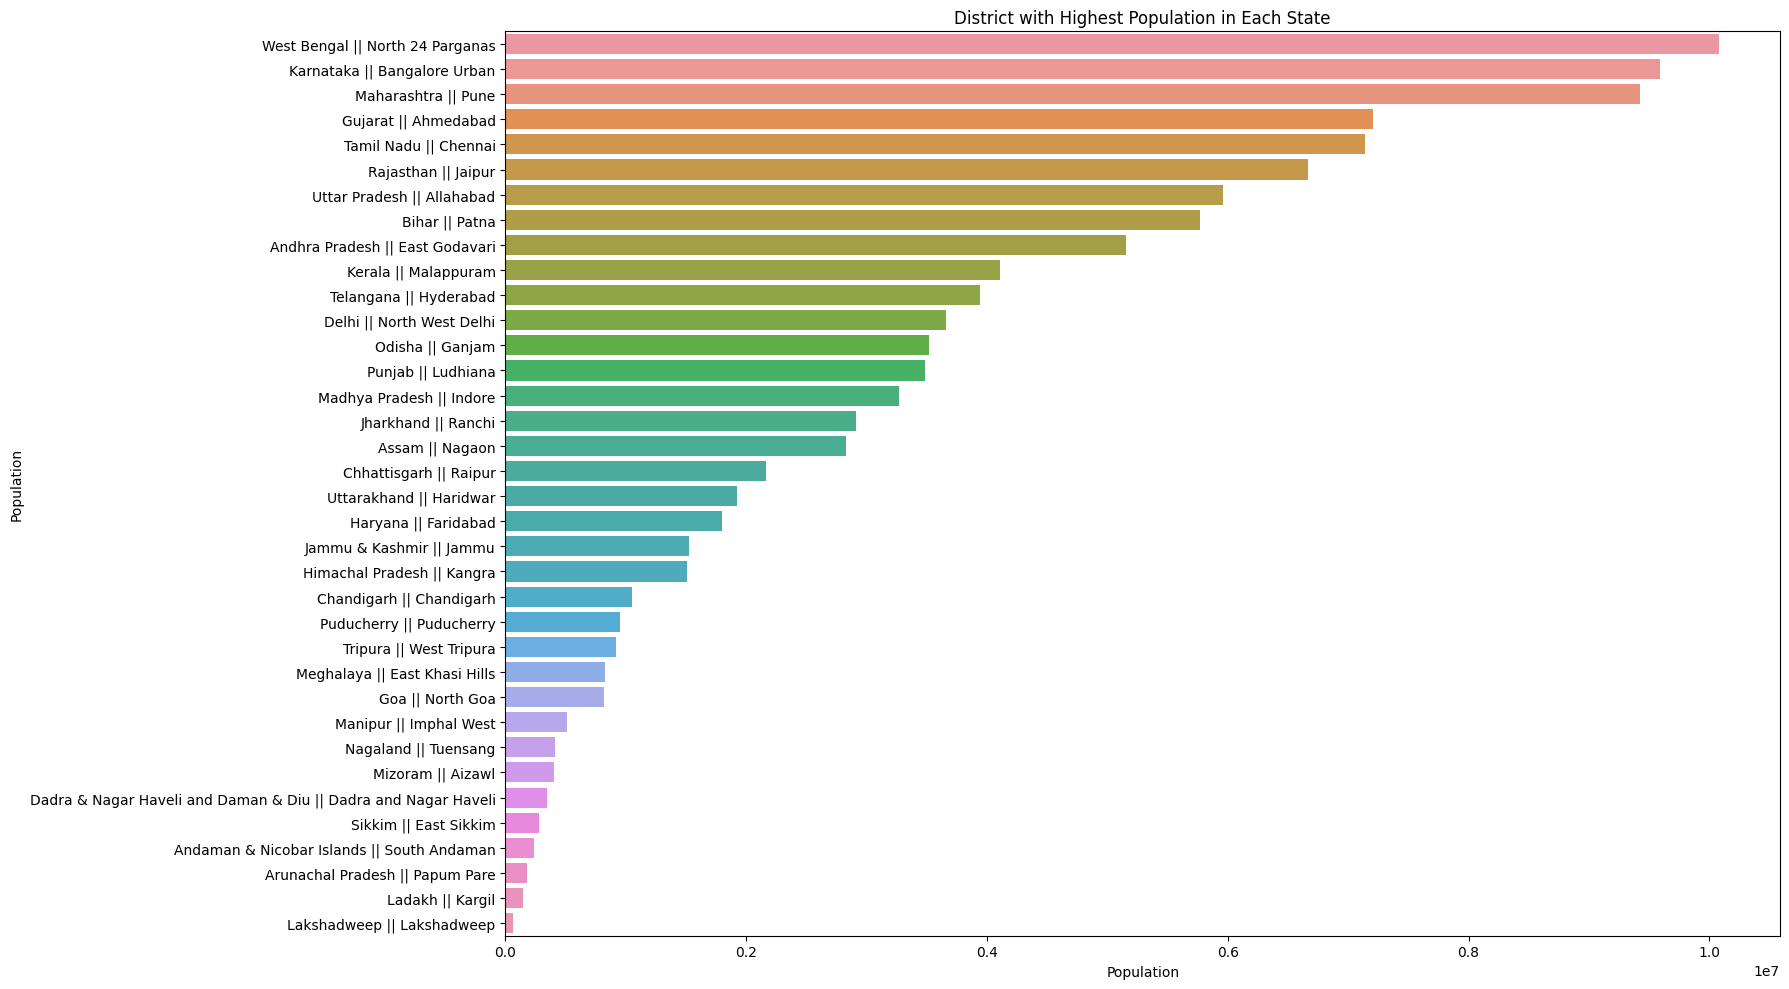

In [178]:
# Set district and state together as x-axis labels for clarity
result["Label"] = result["State"] + " || " + result["District"] 

# Sort for better appearance (optional)
result = result.sort_values("Population", ascending=False)

# Plot Horizontal bar chart
plt.figure(figsize=(18, 10))
sns.barplot(data = result,x="Population",y="Label") # plt.barh(result["Label"], result["Population"], color='mediumseagreen')
plt.ylabel("Population")
plt.title("District with Highest Population in Each State")
plt.tight_layout()
plt.show()

## 2.5: Calculate the average transaction value (ATV) for each state
### A) . Compute the average transaction value for each state. Display the results in a tabular format.
### B) . Identify the top 5 states with the highest ATV and the top 5 states with the lowest ATV. Display the results.

In [181]:
# -----------------------------
# PART A: Compute the average transaction value for each state
# -----------------------------
# Compute average transaction value (ATV) for each state
atv_by_states = State_Txn_Users.groupby("State")["ATV (INR)"].mean().reset_index()

# Rename column for clarity
atv_by_states.columns = ["State", "Average Transaction Value"]

# Display result
atv_by_states

# -----------------------------
# PART A:  Top 5 states with the Highest and lowest ATV
# -----------------------------

# Sort by ATV
sorted_atv = atv_by_states.sort_values(by="Average Transaction Value", ascending=False)

top_5_states = sorted_atv.head(5)["State"].tolist()
bottom_5_states = sorted_atv.tail(5)["State"].tolist()

print("Top 5 States by ATV:\n", top_5_states)
print("\nBottom 5 States by ATV:\n", bottom_5_states)


,State,Average Transaction Value
0,Andaman & Nicobar Islands,3159.27
1,Andhra Pradesh,1748.09
2,Arunachal Pradesh,2638.32
3,Assam,2008.50
4,Bihar,2023.32
5,Chandigarh,2113.80
6,Chhattisgarh,1650.82
7,Dadra & Nagar Haveli and Daman & Diu,1487.40
8,Delhi,1589.84
9,Goa,1895.26


Top 5 States by ATV:
 ['Ladakh', 'Andaman & Nicobar Islands', 'Mizoram', 'Lakshadweep', 'Arunachal Pradesh']

Bottom 5 States by ATV:
 ['Karnataka', 'Maharashtra', 'Dadra & Nagar Haveli and Daman & Diu', 'Odisha', 'West Bengal']


## 2.6: Analyze app usage trends
### A) . Calculate the total number of app opens over the years and quarters for each state. Display the results in a tabular format.
### B) .Identify trends in app usage by creating a line plot showing the number of app opens over time for a selected state.

,State,Year,Quarter,App Opens
0,Andaman & Nicobar Islands,2018,1,0
1,Andaman & Nicobar Islands,2018,2,0
2,Andaman & Nicobar Islands,2018,3,0
3,Andaman & Nicobar Islands,2018,4,0
4,Andaman & Nicobar Islands,2019,1,0
...,...,...,...,...
499,West Bengal,2020,2,198589332
500,West Bengal,2020,3,246554831
501,West Bengal,2020,4,291721919
502,West Bengal,2021,1,316832674


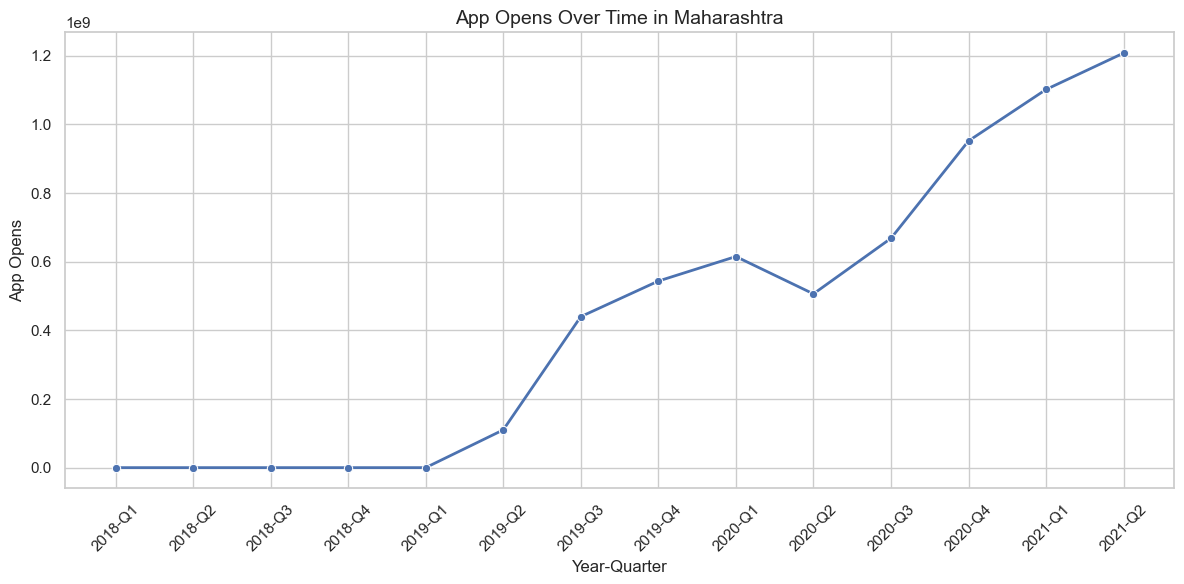

In [149]:
# -----------------------------
# PART A: Calculate Total App Opens Over Time by State
# -----------------------------

# Group the data by State, Year, and Quarter, and calculate the total number of App Opens
app_opens_summary = State_Txn_Users.groupby(["State", "Year", "Quarter"])["App Opens"].sum().reset_index()

# Display the summarized result in tabular form
app_opens_summary

# -----------------------------
# PART B: Plot App Opens Trend for a Selected State
# -----------------------------

def plot_app_opens_by_state(state_name, df):
    """
    Plots app opens over time for a given state.

    Parameters:
    - state_name: Name of the state to analyze (e.g., 'Maharashtra', 'Gujarat')
    - df: DataFrame containing 'State', 'Year', 'Quarter', 'App Opens' columns
    """
    # Filter data for the selected state
    state_data = df[df["State"] == state_name].copy()

    # Create a 'Year-Quarter' column for x-axis
    state_data["Year-Quarter"] = state_data["Year"].astype(str) + "-Q" + state_data["Quarter"].astype(str)

    # Sort by year and quarter for chronological plotting
    state_data = state_data.sort_values(by=["Year", "Quarter"])

    # Set up the plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=state_data, x="Year-Quarter", y="App Opens", marker="o", linewidth=2)

    # Customize the plot
    plt.title(f"App Opens Over Time in {state_name}", fontsize=14)
    plt.xlabel("Year-Quarter")
    plt.ylabel("App Opens")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

# Call the function to plot trends for a specific state (e.g., Maharashtra)
plot_app_opens_by_state("Maharashtra", app_opens_summary)


## 2.7: Distribution of transaction types###  Create a bar chart showing the distribution of different transaction types for each state for the most recent quarter in the dataset.

<Figure size 1400x800 with 0 Axes>

<Axes: xlabel='Transactions', ylabel='State'>

Text(0.5, 1.0, 'Transaction Type Distribution by State - Q2 2021')

Text(0, 0.5, 'State')

Text(0.5, 0, 'Number of Transactions')

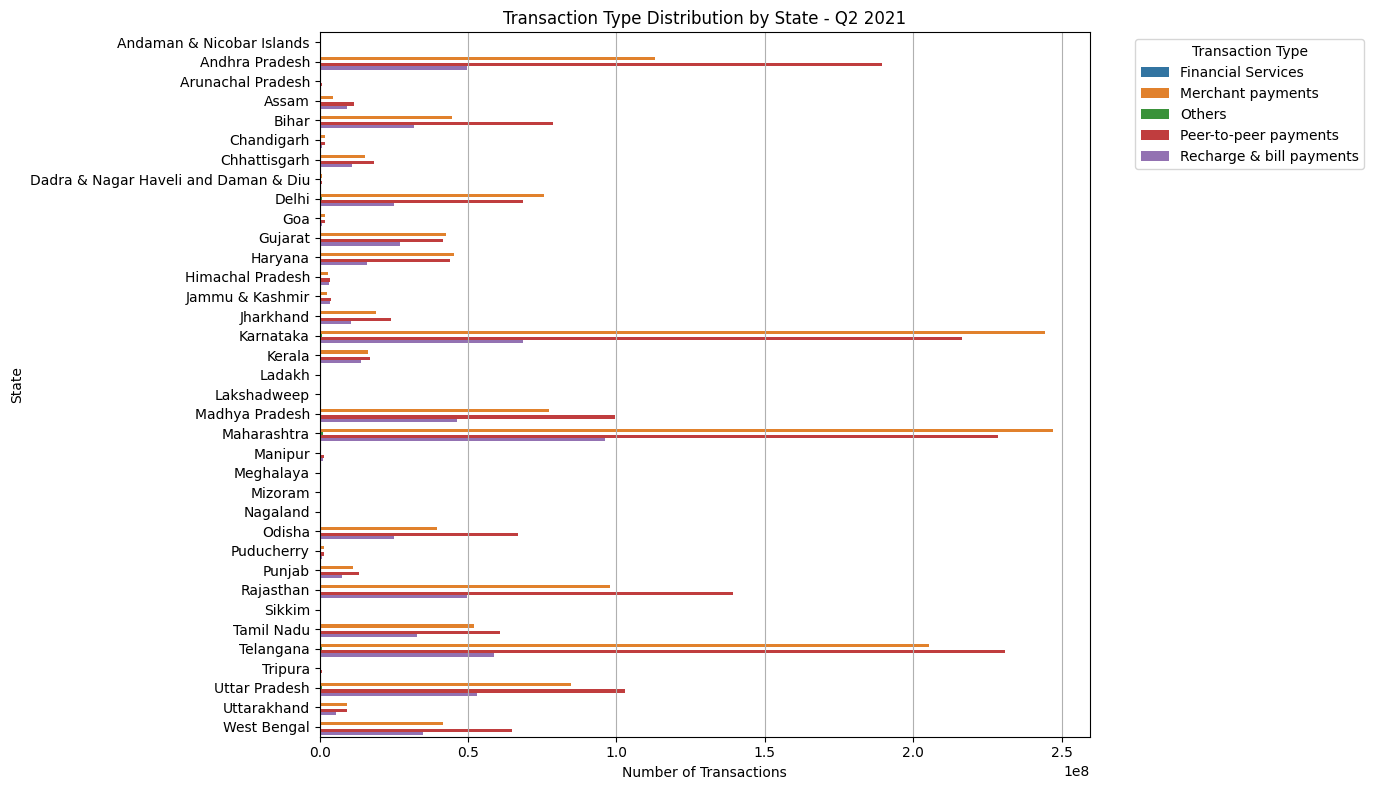

In [150]:
# Find the most recent year and quarter in the dataset
latest_year = State_Txn_Split["Year"].max()
latest_quarter = State_Txn_Split[State_Txn_Split["Year"] == latest_year]["Quarter"].max()

# Filter data for the most recent quarter
latest_data = State_Txn_Split[(State_Txn_Split["Year"] == latest_year) & 
                              (State_Txn_Split["Quarter"] == latest_quarter)]

# Group by State and Transaction Type to get total Transactions
txn_distribution = latest_data.groupby(["State", "Transaction Type"])["Transactions"].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(data=txn_distribution, x="Transactions", y="State", hue="Transaction Type")
plt.title(f"Transaction Type Distribution by State - Q{latest_quarter} {latest_year}")
plt.ylabel("State")
plt.xlabel("Number of Transactions")
#plt.xticks(rotation=90)
plt.legend(title="Transaction Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True,axis="x")
plt.show()

### 2.8: Find unique mapping between district name and district code
1. Identify the unique mapping between district names and district codes from the dataset.
2. Create a CSV file containing the unique district name and district code mappings.
3. Export the CSV file.

In [140]:
# Create dictionary: 
#District Name ➝ Code
district_to_code = dict(zip(District_Demo["District"], District_Demo["Code"]))

# Code ➝ District Name
code_to_district = dict(zip(District_Demo["Code"], District_Demo["District"]))

# Lookup example
district_to_code["Indore"]  # Returns something like 'MP23'
code_to_district["MP23"]    # Returns something like 'Indore'

# Create unique district-code mapping DataFrame
unique_district_mapping = District_Demo[["District", "Code"]].drop_duplicates().reset_index(drop=True)

# Export the mapping to a CSV file
#unique_district_mapping.to_csv(r"C:\Users\Harshit\Downloads\unique_district_code_mapping.csv", index=False)


'MP23'

'Indore'

# Task 3: Data Quality Checks.

##  Ensure data consistency across state and district levels.
1. For each state, calculate the total number of transactions, total transaction amount, and total registered users by summing up the values from the district level data.
2. Compare the results with the corresponding values at the state level to ensure they match.
3. Display any discrepancies found between the district-level and state-level data

In [113]:
# Aggregate district-level data
district_agg = District_Txn_Users.groupby('State').agg(
    total_transactions=('Transactions', 'sum'),
    total_amount=('Amount (INR)', 'sum'),
    total_registered_users=('Registered Users', 'sum')
).reset_index()

# Aggregate state-level data
state_agg = State_Txn_Users.groupby('State').agg(
    total_transactions=('Transactions', 'sum'),
    total_amount=('Amount (INR)', 'sum'),
    total_registered_users=('Registered Users', 'sum')
).reset_index()

# Compare and count mismatches
transactions_mismatch = (~(state_agg["total_transactions"] == district_agg["total_transactions"])).sum()
amount_mismatch = (~(state_agg["total_amount"] == district_agg["total_amount"])).sum()
users_mismatch = (~(state_agg["total_registered_users"] == district_agg["total_registered_users"])).sum()

print("Mismatched States:")
print("Transactions:", transactions_mismatch)
print("Amount:", amount_mismatch)
print("Registered Users:", users_mismatch)


Mismatched States:
Transactions: 0
Amount: 35
Registered Users: 0


# Task 4: Data Merging and Advanced Analysis

## 4.1: Ratio of users to population by state
1. Merge the State_Txn and Users dataset with the District Demographics dataset to calculate the ratio of registered users to the population for each state. Display the results in a tabular format.
2. Create a column chart depicting the ratio of users to population by state

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='User-to-Population Ratio', ylabel='State'>

Text(0.5, 1.0, 'User-to-Population Ratio by State')

Text(0.5, 0, 'Ratio')

Text(0, 0.5, 'State')

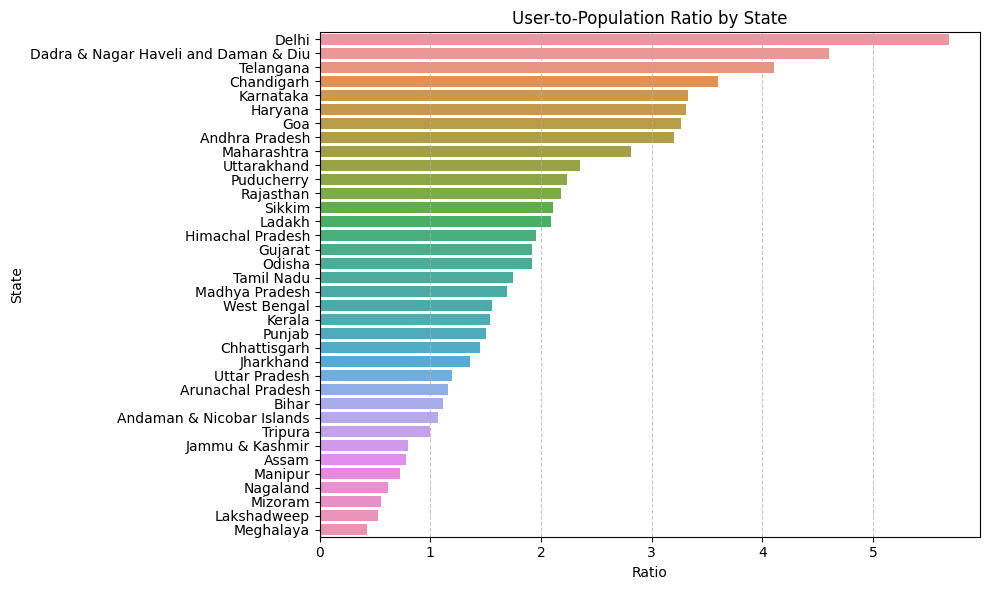

In [190]:
# Grouping and merging
df_dem_grouped = District_Demo.groupby("State")["Population"].sum().reset_index()
df_state_registered = State_Txn_Users.groupby("State")["Registered Users"].sum().reset_index()
df_merged = df_state_registered.merge(df_dem_grouped, on=["State"], how="inner")

# Calculate ratio
df_merged["User-to-Population Ratio"] = df_merged["Registered Users"] / df_merged["Population"]

# Sort descending
df_merged = df_merged.sort_values(by="User-to-Population Ratio", ascending=False)

# Plotting horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=df_merged, x="User-to-Population Ratio", y="State")
plt.title("User-to-Population Ratio by State")
plt.xlabel("Ratio")
plt.ylabel("State")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 4.2: Correlate population density with transaction volume
1. Merge the District_Txn and Users dataset with the District Demographics dataset.
2. Calculate the correlation between population density and transaction volume.
3. Create a scatter plot to visualize the correlation between population density and transaction volume.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Density', ylabel='Transactions'>

Text(0.5, 1.0, 'Correlation Between Population Density and Transaction Volume\nCorrelation: 0.05')

Text(0.5, 0, 'Average Population Density (people/sq km)')

Text(0, 0.5, 'Total Transaction Volume')

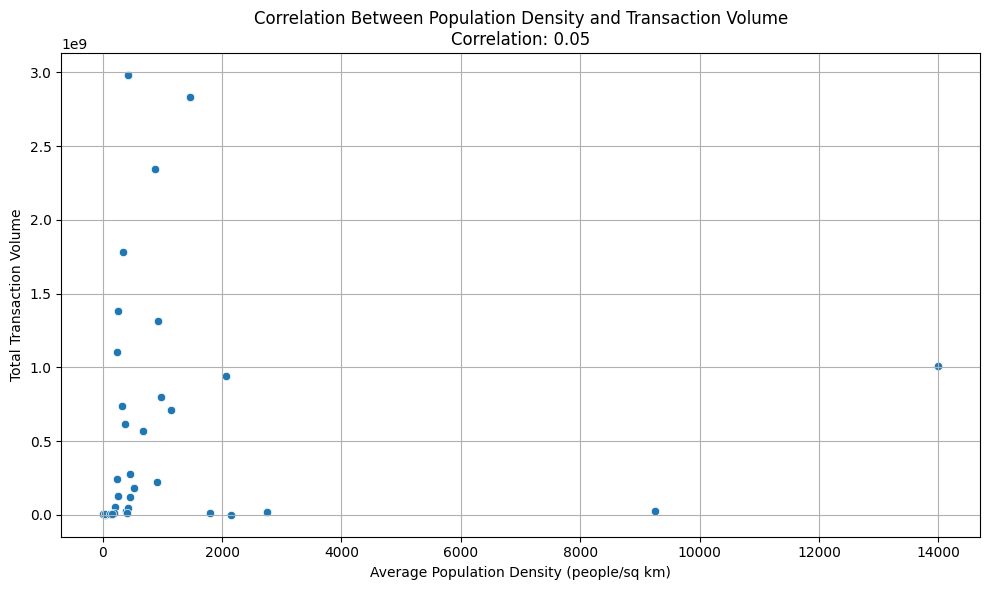

I see it shows a very weak correlation (0.05) between average population density and total transaction volume by state


In [270]:
# Group transaction volume by state
df_txn_grouped = District_Txn_Users.groupby(['State'])['Transactions'].sum().reset_index()

# Use average density per state
df_demo_grouped = District_Demo.groupby(['State'])['Density'].mean().reset_index()

# Merge datasets
df_merged = pd.merge(df_txn_grouped, df_demo_grouped, on=['State'], how="inner")

# Calculate correlation
correlation = df_merged["Transactions"].corr(df_merged["Density"])

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x='Density', y='Transactions')
plt.title(f'Correlation Between Population Density and Transaction Volume\nCorrelation: {correlation:.2f}')
plt.xlabel('Average Population Density (people/sq km)')
plt.ylabel('Total Transaction Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

print("I see it shows a very weak correlation (0.05) between average population density and total transaction volume by state.")

## 4.3: Average transaction amount per user
1. Use relevant datasets to calculate the average transaction amount per user for each state. Display the results in a tabular format.
2. Identify the top 5 states with the highest average transaction amount per user and the top 5 states with the lowest average transaction amount per user. Display the results.

In [30]:
# Group data by state to calculate total transaction amount and total registered users
df_state = State_Txn_Users.groupby("State").agg(
    Total_amount=('Amount (INR)', "sum"),                   # Sum of all transaction amounts
    Total_registered_users=('Registered Users', "sum")      # Sum of all registered users
)

# Calculate average transaction amount per user for each state
df_state["Avg_Transaction_Amount_per_User"] = (
    df_state["Total_amount"] / df_state["Total_registered_users"]
)

# Get the top 5 states with highest average transaction amount per user
top_5_states = df_state["Avg_Transaction_Amount_per_User"].nlargest(5).index.to_list()

# Get the bottom 5 states with lowest average transaction amount per user
bottom_5_states = df_state["Avg_Transaction_Amount_per_User"].nsmallest(5).index.to_list()

# Print results
print("🔝 Top 5 States by Avg Transaction Amount per User:\n", top_5_states)
print("🔻 Bottom 5 States by Avg Transaction Amount per User:\n", bottom_5_states)


🔝 Top 5 States by Avg Transaction Amount per User:
 ['Telangana', 'Karnataka', 'Andhra Pradesh', 'Rajasthan', 'Delhi']
🔻 Bottom 5 States by Avg Transaction Amount per User:
 ['Lakshadweep', 'Tripura', 'Dadra & Nagar Haveli and Daman & Diu', 'Kerala', 'Himachal Pradesh']


## 4.4: Device brand usage ratio
1. Merge the State_DeviceData dataset with the State_Txn and Users dataset.
2. Calculate the ratio of users using each device brand to the total number of registered users in each state. Display the results in a tabular format.

In [117]:

# Step 1: Total registered users per state (from State_Txn_Users)
df_state_registered = State_Txn_Users.groupby(['State'])[['Registered Users']].sum().reset_index()
df_state_registered.rename(columns={'Registered Users': 'Total_Registered_Users'}, inplace=True)

# Step 2: Brand-wise registered users per state (from State_Device_Data)
df_device_registered = State_Device_Data.groupby(['State', 'Brand'])[['Registered Users']].sum().reset_index()

# Step 3: Merge both datasets
df_merged = pd.merge(df_device_registered, df_state_registered, on='State', how='inner')

# Step 4: Calculate brand usage ratio (prevent integer division)
df_merged['Brand_Usage_Ratio'] = (df_merged['Registered Users'] / df_merged['Total_Registered_Users'])*100

# Step 5: Tabular result
result_table = df_merged[['State', 'Brand', 'Brand_Usage_Ratio']]
result_table

,State,Brand,Brand_Usage_Ratio
0,Andaman & Nicobar Islands,Apple,2.29
1,Andaman & Nicobar Islands,Huawei,2.82
2,Andaman & Nicobar Islands,Lenovo,1.31
3,Andaman & Nicobar Islands,Motorola,2.32
4,Andaman & Nicobar Islands,OnePlus,3.77
...,...,...,...
443,West Bengal,Others,12.15
444,West Bengal,Realme,6.46
445,West Bengal,Samsung,21.16
446,West Bengal,Vivo,13.00


# Task 5: Data Visualization
### 5.1: Plot the total transactions and amount over time for a selected stat
Create a line plot showing the total number of transactions and the total transaction amount over time (years and quarters) for a selected state.


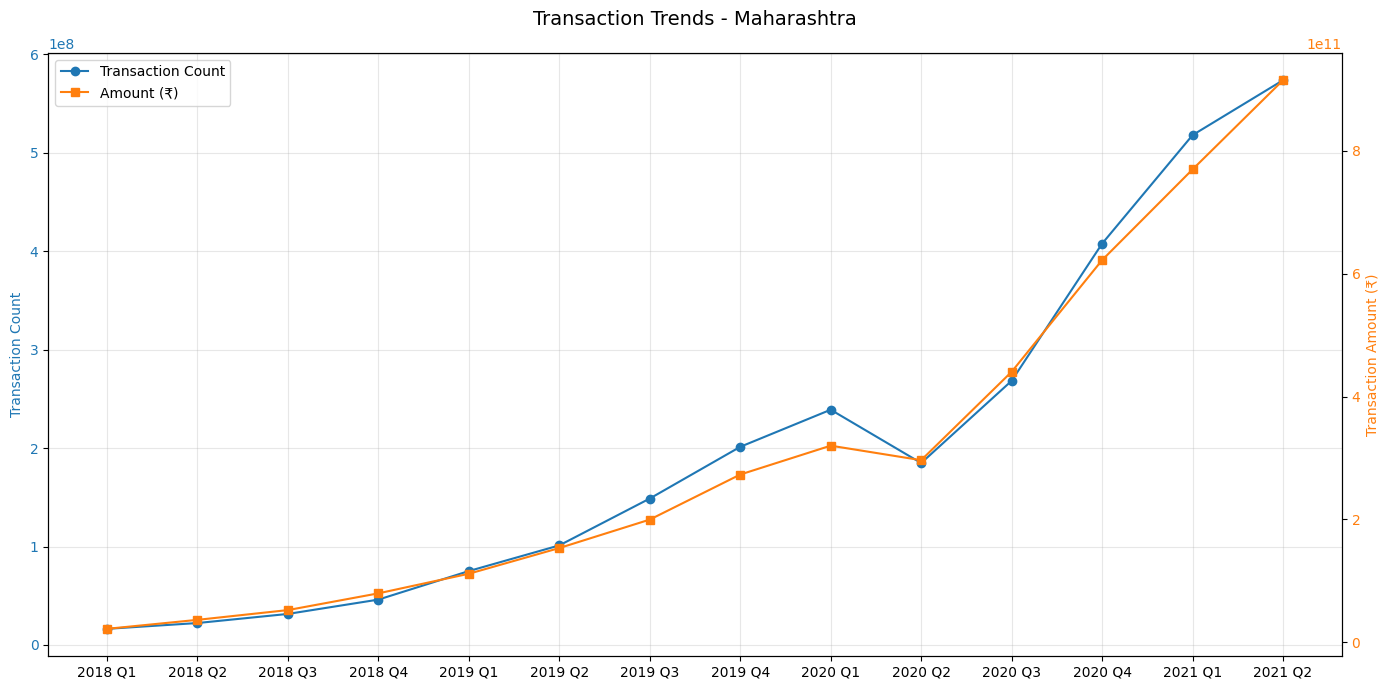

In [63]:
# Define a function
def plot_combined_transaction_trends(state_name):
    # Step 1: Aggregate data to get total transactions and total amount per state, year, and quarter
    df_processed = State_Txn_Users.groupby(['State', 'Year', 'Quarter']).agg(
        Transaction_Count=('Transactions', 'sum'),
        Transaction_Amount=('Amount (INR)', 'sum')
    ).reset_index()
    
    # Step 2: Filter data for the selected state
    state_data = df_processed[df_processed['State'] == state_name].copy()
    
    # Step 3: Create a 'Period' column to represent "Year QQuarter" (e.g., 2022 Q3)
    state_data['Period'] = state_data['Year'].astype(str) + ' Q' + state_data['Quarter'].astype(str)
    
    # Step 4: Set up the plot figure
    plt.figure(figsize=(14, 7))
    
    # Step 5: Create the first y-axis for Transaction Count
    ax1 = plt.gca()  # Get current axes
    line1 = ax1.plot(
        state_data['Period'], 
        state_data['Transaction_Count'], 
        marker='o', color='tab:blue', label='Transaction Count'
    )
    ax1.set_ylabel('Transaction Count', color='tab:blue')  # Y-axis label
    ax1.tick_params(axis='y', labelcolor='tab:blue')       # Y-axis tick color
    ax1.grid(True, alpha=0.3)                              # Light grid for readability
    
    # Step 6: Create a second y-axis for Transaction Amount (shares same x-axis)
    ax2 = ax1.twinx()
    line2 = ax2.plot(
        state_data['Period'], 
        state_data['Transaction_Amount'], 
        marker='s', color='tab:orange', label='Amount (₹)'
    )
    ax2.set_ylabel('Transaction Amount (₹)', color='tab:orange')
    ax2.tick_params(axis='y', labelcolor='tab:orange')
    
    # Step 7: Set plot title and format x-axis
    plt.title(f'Transaction Trends - {state_name}', fontsize=14, pad=20)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    
    # Step 8: Combine legends from both axes
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='upper left')
    
    # Step 9: Layout adjustment and show plot
    plt.tight_layout()
    plt.show()

# call a function
plot_combined_transaction_trends("Maharashtra")


### 5.2: Create a pie chart showing the distribution of transaction types for a specific quarter
 Create a pie chart showing the distribution of different transaction types for a selected state and quarter.

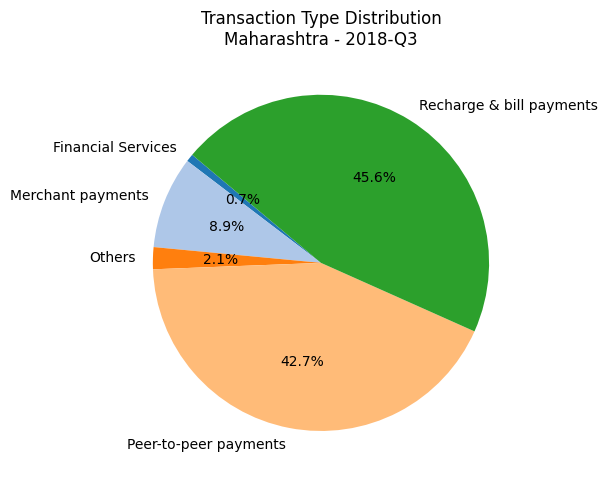

In [123]:
# Define a function
def plot_transaction_type_pie(state_name, year, quarter):
    # Step 1: Filter data for the given state, year, and quarter
    df_filtered = State_Txn_Split[
        (State_Txn_Split['State'] == state_name) &
        (State_Txn_Split['Year'] == year) &
        (State_Txn_Split['Quarter'] == quarter)
    ]

    # Step 2: Aggregate the number of transactions by transaction type
    txn_summary = df_filtered.groupby('Transaction Type')['Transactions'].sum()

    # Step 3: Create the pie chart
    plt.figure(figsize=(6, 6))  # Set the size of the pie chart
    plt.pie(
        txn_summary,                          # Values for the pie slices
        labels=txn_summary.index,             # Labels for each slice
        autopct='%1.1f%%',                    # Show percentages on the slices
        startangle=140,                       # Rotate the start of the pie chart
        colors=plt.cm.tab20.colors            # Use a categorical color map
    )
    
    # Step 4: Formatting and display
    plt.title(f'Transaction Type Distribution\n{state_name} - {year}-Q{quarter}', fontsize=12)
    plt.tight_layout()       # Prevent label cutoff
    plt.show()               # Display the chart

# call a function
plot_transaction_type_pie('Maharashtra', 2018, 3)


### 5.3: Visualize the population density of districts in a selected state
Create a bar plot showing the population density of districts in a selected state

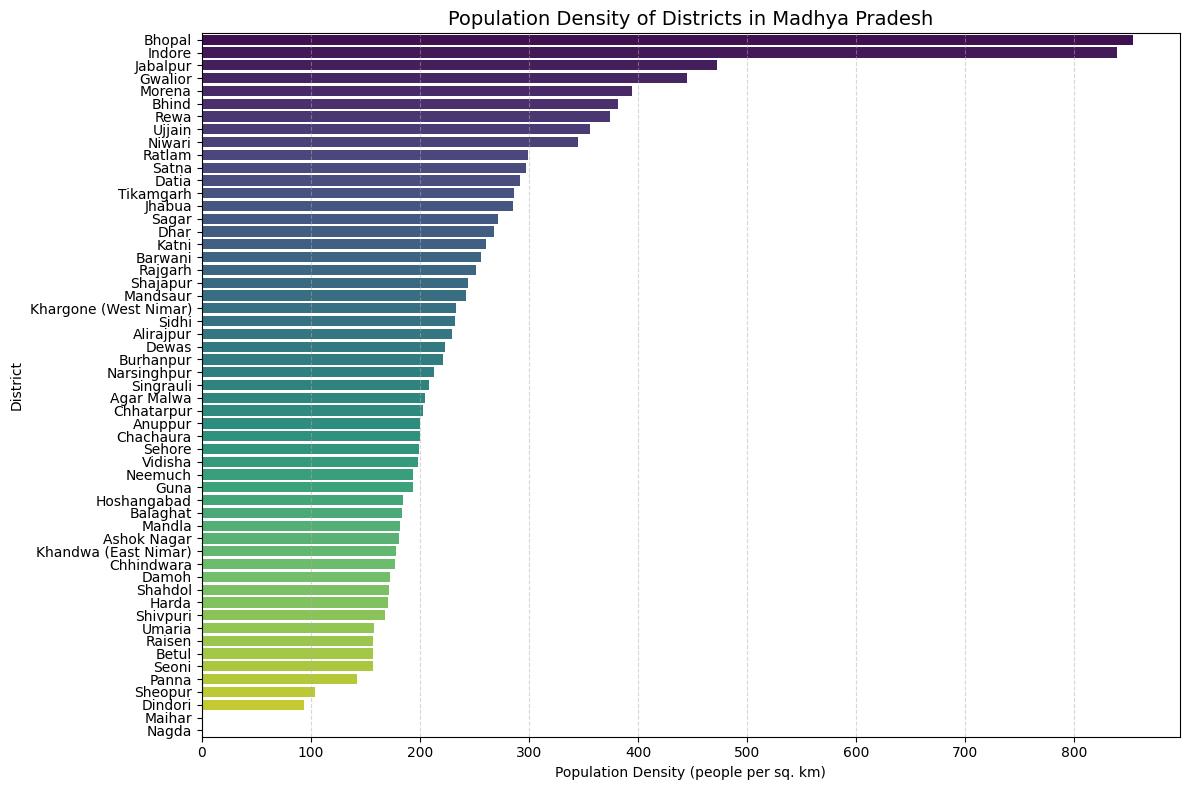

In [187]:
# Define a function
def plot_district_density(state_name):
    # Step 1: Filter the dataset for the selected state
    state_df = District_Demo[District_Demo['State'] == state_name]

    # Step 2: Sort districts by density for better visualization
    state_df = state_df.sort_values(by='Density', ascending=False)

    # Step 3: Create the bar plot using seaborn
    plt.figure(figsize=(12, 8))
    sns.barplot(data=state_df, x='Density', y='District', palette='viridis')

    # Step 4: Add titles and labels
    plt.title(f'Population Density of Districts in {state_name}', fontsize=14)
    plt.xlabel('Population Density (people per sq. km)')
    plt.ylabel('District')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Example usage
plot_district_density("Madhya Pradesh")


# Task 6: Insights and Conclusions 
## 6.1: Identify any trends or patterns in the transaction data
### Analyze the transaction data to identify any noticeable trends or patterns. Summarize your findings. 

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

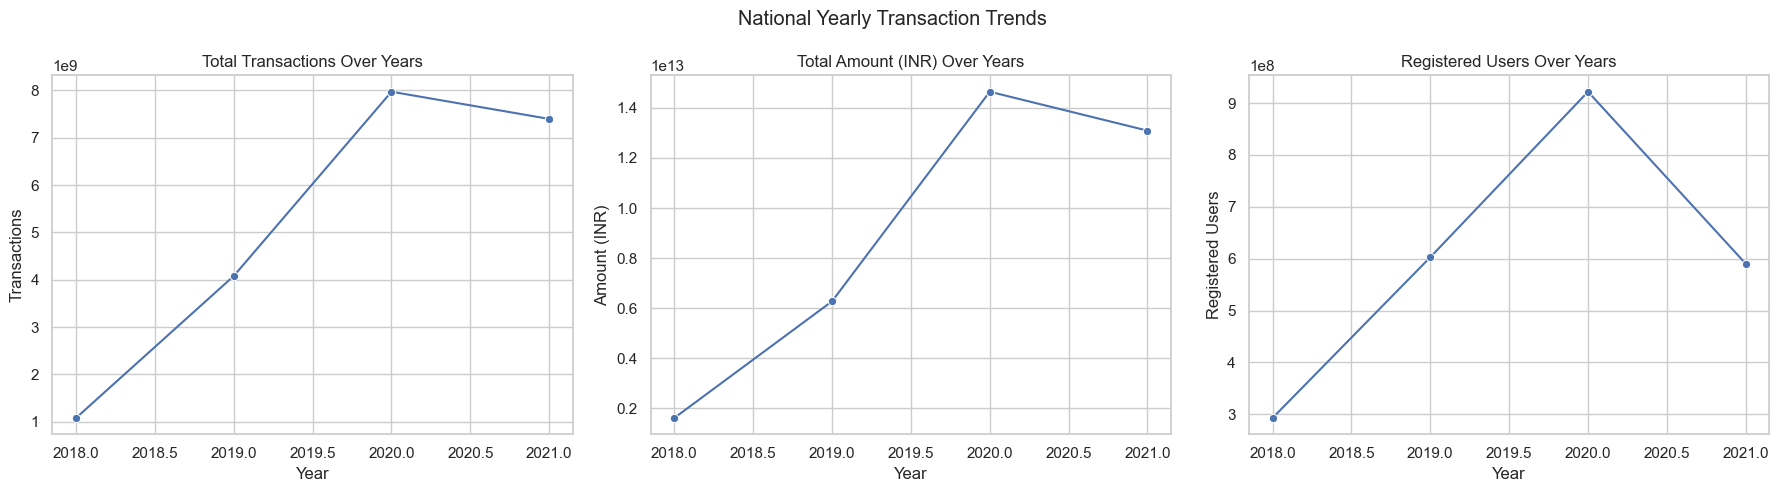

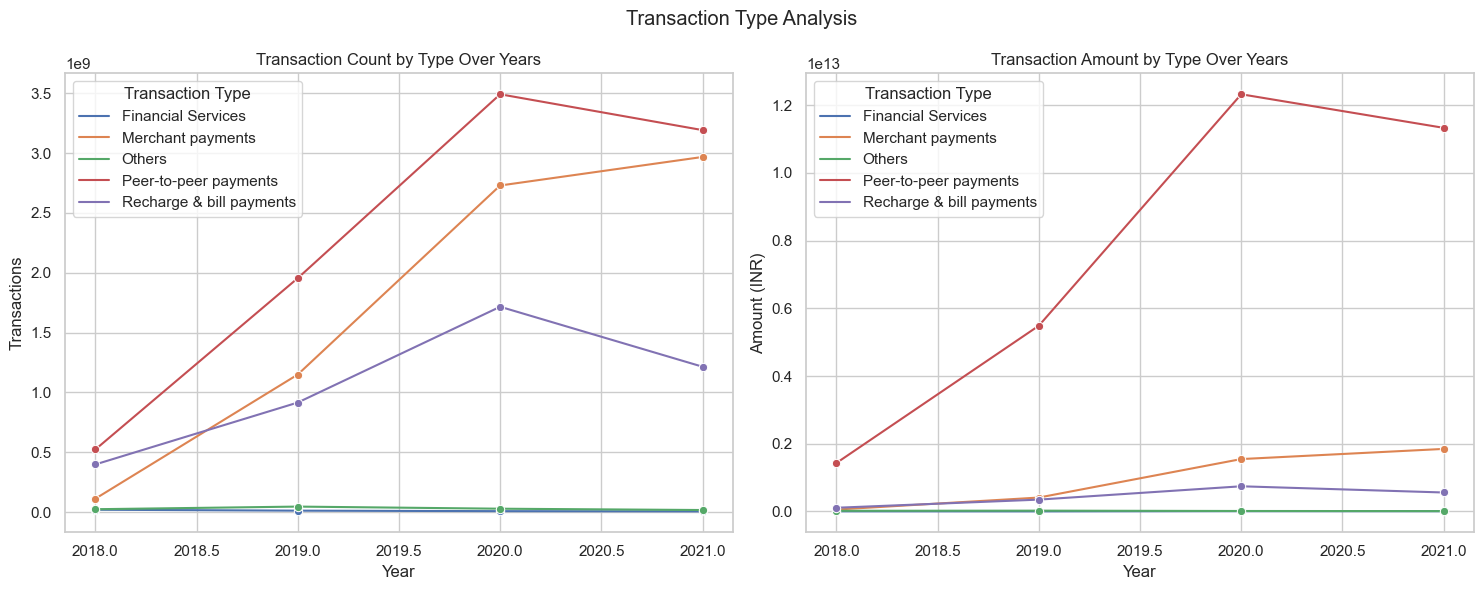

In [143]:
# Set style for better visuals
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# 1. Yearly Transaction Trends Analysis
def plot_yearly_trends(df, title):
    yearly_data = df.groupby('Year').agg({
        'Transactions': 'sum',
        'Amount (INR)': 'sum',
        'Registered Users': 'sum'
    }).reset_index()
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Transaction count trend
    sns.lineplot(data=yearly_data, x='Year', y='Transactions', ax=axes[0], marker='o')
    axes[0].set_title('Total Transactions Over Years')
    
    # Transaction amount trend
    sns.lineplot(data=yearly_data, x='Year', y='Amount (INR)', ax=axes[1], marker='o')
    axes[1].set_title('Total Amount (INR) Over Years')
    
    # Registered users trend
    sns.lineplot(data=yearly_data, x='Year', y='Registered Users', ax=axes[2], marker='o')
    axes[2].set_title('Registered Users Over Years')
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


# 2. Transaction Type Analysis
def plot_transaction_types(df, title):
    type_data = df.groupby(['Year', 'Transaction Type']).agg({
        'Transactions': 'sum',
        'Amount (INR)': 'sum'
    }).reset_index()
    
    plt.figure(figsize=(15, 6))
    
    # Transaction count by type
    plt.subplot(1, 2, 1)
    sns.lineplot(data=type_data, x='Year', y='Transactions', hue='Transaction Type', marker='o')
    plt.title('Transaction Count by Type Over Years')
    
    # Transaction amount by type
    plt.subplot(1, 2, 2)
    sns.lineplot(data=type_data, x='Year', y='Amount (INR)', hue='Transaction Type', marker='o')
    plt.title('Transaction Amount by Type Over Years')
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

plot_yearly_trends(State_Txn_Users, 'National Yearly Transaction Trends')
plot_transaction_types(State_Txn_Split, 'Transaction Type Analysis')


## 6.2: Correlate demographic data with transaction data
###  Find correlations between demographic data (e.g. population, density) and transaction data (e.g. transaction volume)

,Population,Area (sq km),Density,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
Population,1.00,0.32,0.30,0.36,0.35,-0.24,0.66,0.42
Area (sq km),0.32,1.00,-0.18,0.13,0.13,-0.09,0.25,0.25
Density,0.30,-0.18,1.00,0.31,0.34,-0.05,0.30,0.17
Transactions,0.36,0.13,0.31,1.00,0.98,-0.03,0.80,0.84
Amount (INR),0.35,0.13,0.34,0.98,1.00,0.01,0.78,0.84
ATV (INR),-0.24,-0.09,-0.05,-0.03,0.01,1.00,-0.07,0.02
Registered Users,0.66,0.25,0.30,0.80,0.78,-0.07,1.00,0.86
App Opens,0.42,0.25,0.17,0.84,0.84,0.02,0.86,1.00


<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Demographic Correlations with Transaction Metrics')

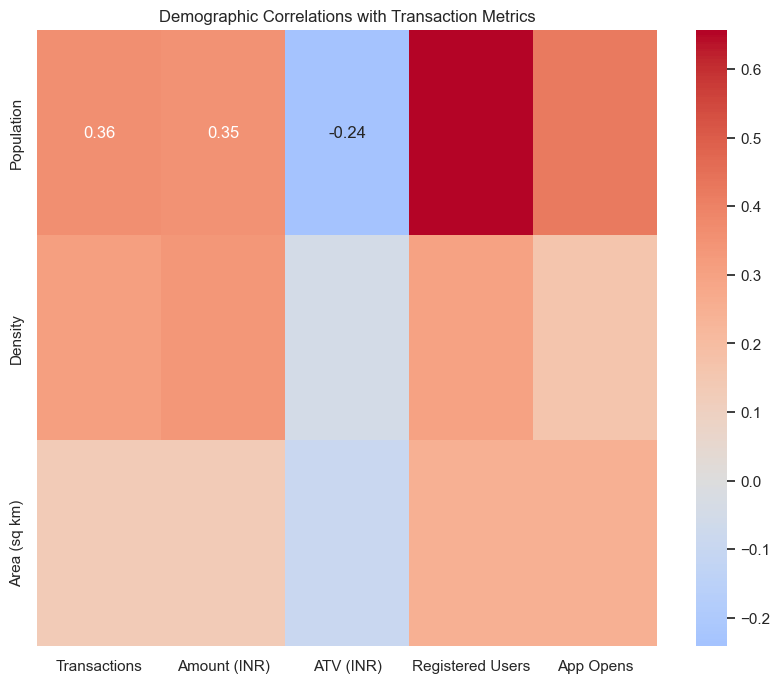

In [100]:
# Merge district transaction data with demographic data
merged_df = pd.merge(
    District_Txn_Users,
    District_Demo,
    on=['State', 'District'],
    how='inner'
)
# Selecting relevant numeric columns
numeric_cols = ['Population', 'Area (sq km)', 'Density',
                'Transactions', 'Amount (INR)', 'ATV (INR)',
                'Registered Users', 'App Opens']

# Compute correlation matrix
correlation_matrix = merged[numeric_cols].corr()
correlation_matrix

# Visualize the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix[['Transactions', 'Amount (INR)', 'ATV (INR)',"Registered Users",	"App Opens"]]
            .loc[['Population', 'Density', 'Area (sq km)']], 
            annot=True, cmap='coolwarm', center=0)
plt.title('Demographic Correlations with Transaction Metrics')
plt.show()